In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as sig

In [2]:
def get_data(data_path):
    temp_force = []
    temp_time = []
    with open(data_path,"r") as f:
        for row in f:
            row = row.rstrip().split(",")
            temp_force.append(float(row[0]))
            temp_time.append(float(row[1]))
    
    temp_force = sig.medfilt(temp_force,5)
    temp_force = sig.medfilt(temp_force,5)
    temp_time = sig.medfilt(temp_time,5)
    temp_time = sig.medfilt(temp_time,5)

    return temp_time,temp_force

def normalize(data,firstn):
    avg = np.mean(data[0:firstn])
    ndata = [i-avg for i in data]
    return ndata


# Purple Motor - Endurance

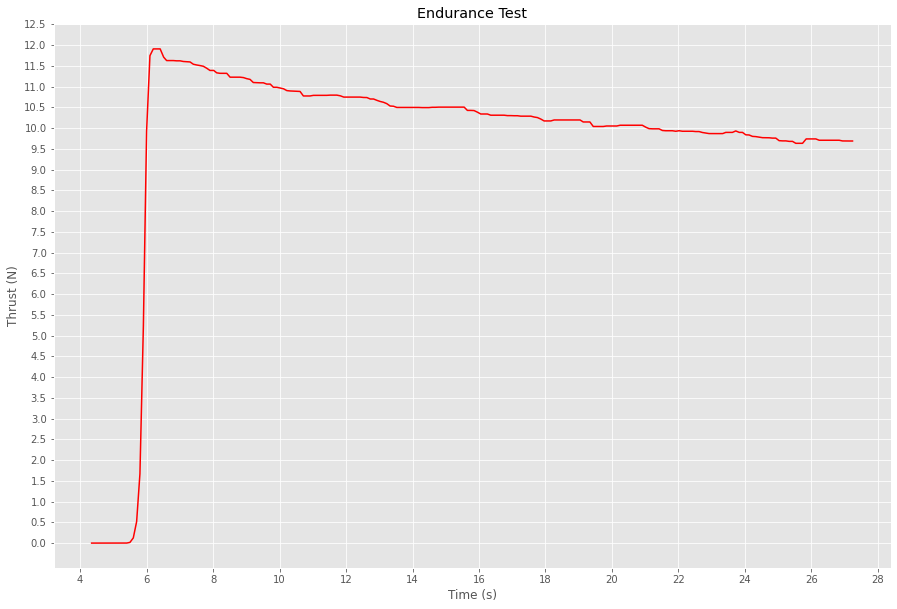

ValueError: Format 'txt' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

In [7]:
t,thrust = get_data("data/purple_motor/endurance_90.txt")
thrust = normalize(thrust,5)

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(np.arange(0,35,2))
plt.yticks(np.arange(0,15,0.5))
ax.set(ylabel="Thrust (N)", xlabel="Time (s)", title="Endurance Test")
ax.plot(t[40:250],thrust[40:250],'-r')
plt.show()
fig.savefig("purple_endurance.png")


In [51]:
avg_thrust = np.mean(thrust[55:150])
print("Time = ", round(t[150] - t[55],3))
print("Average thrust = ", round(avg_thrust,3)*4)

Time =  10.354
Average thrust =  43.712


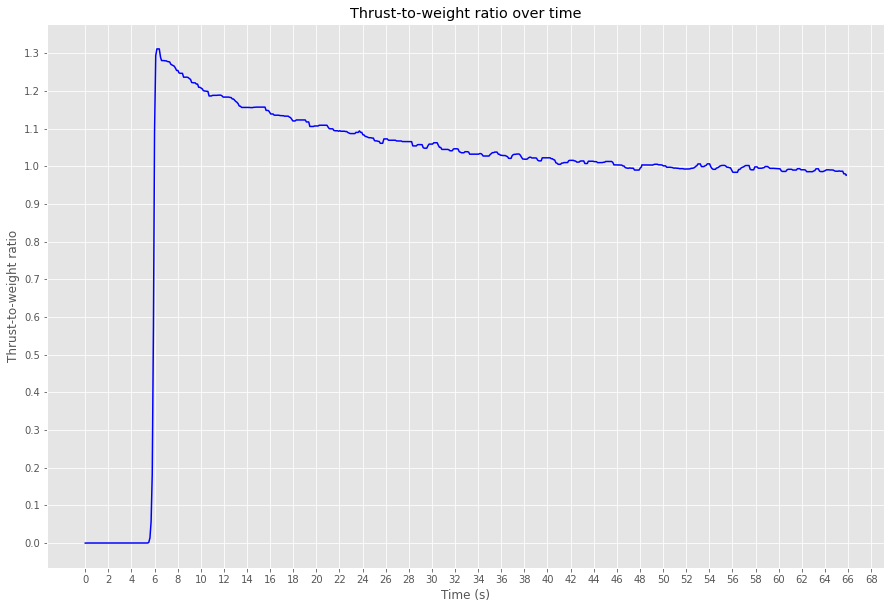

In [46]:
W = 3.7*9.81
tw = [(i*4)/W for i in thrust]
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(np.arange(0,70,2))
plt.yticks(np.arange(0,3.0,0.1))
ax.set(ylabel="Thrust-to-weight ratio", xlabel="Time (s)", title="Thrust-to-weight ratio over time")
ax.plot(t,tw,'-b')
plt.show()

# Different blades

In [32]:
purple_data_paths = ["data/purple_motor/8045_90.txt", "data/purple_motor/9045_90.txt", "data/purple_motor/9047_90.txt", "data/purple_motor/1045_90.txt"]

purple_thrust = []
purple_time = []
for file in purple_data_paths:
    time,thrust = get_data(file)
    purple_thrust.append(thrust)
    purple_time.append(time)



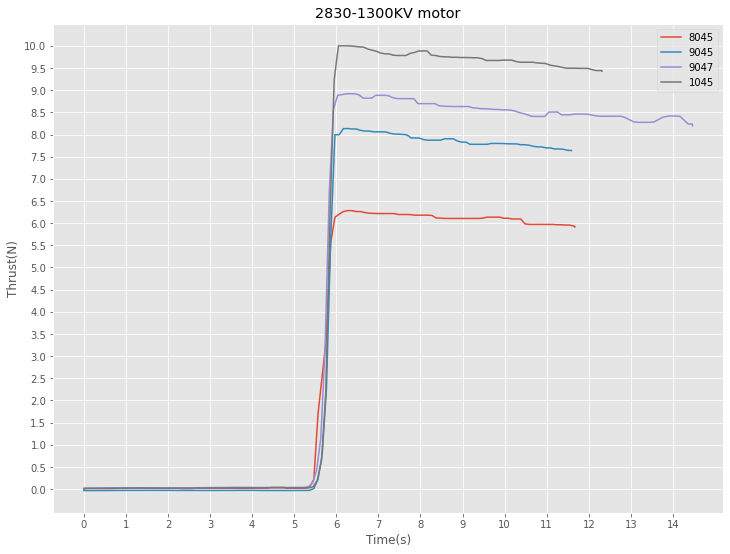

In [33]:

labels = ["8045","9045", "9047","1045"]
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12,9))
for i in range(len(purple_time)):
    ax.plot(purple_time[i],purple_thrust[i],label=labels[i])
ax.legend()
ax.set(xlabel="Time(s)",ylabel="Thrust(N)",title="2830-1300KV motor")
plt.xticks(np.arange(0,15,1))
plt.yticks(np.arange(0,10.5,0.5))
plt.show()



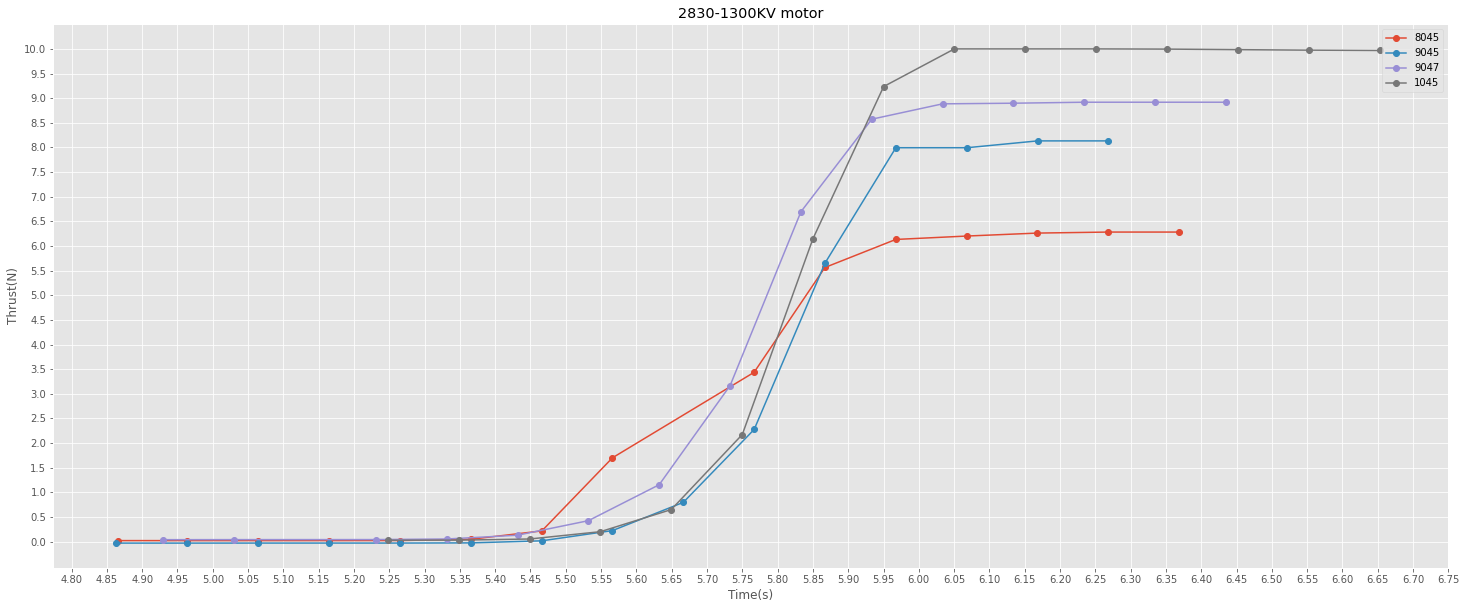

In [38]:
labels = ["8045","9045", "9047","1045"]
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25,10))
for i in range(len(purple_time)):
    ax.plot(purple_time[i][50:65],purple_thrust[i][50:65],"-o",label=labels[i])
ax.legend()
ax.set(xlabel="Time(s)",ylabel="Thrust(N)",title="2830-1300KV motor")
plt.xticks(np.arange(4.8,6.8,0.05))
plt.yticks(np.arange(0,10.5,0.5))
plt.savefig("purple_motor.png")
plt.show()



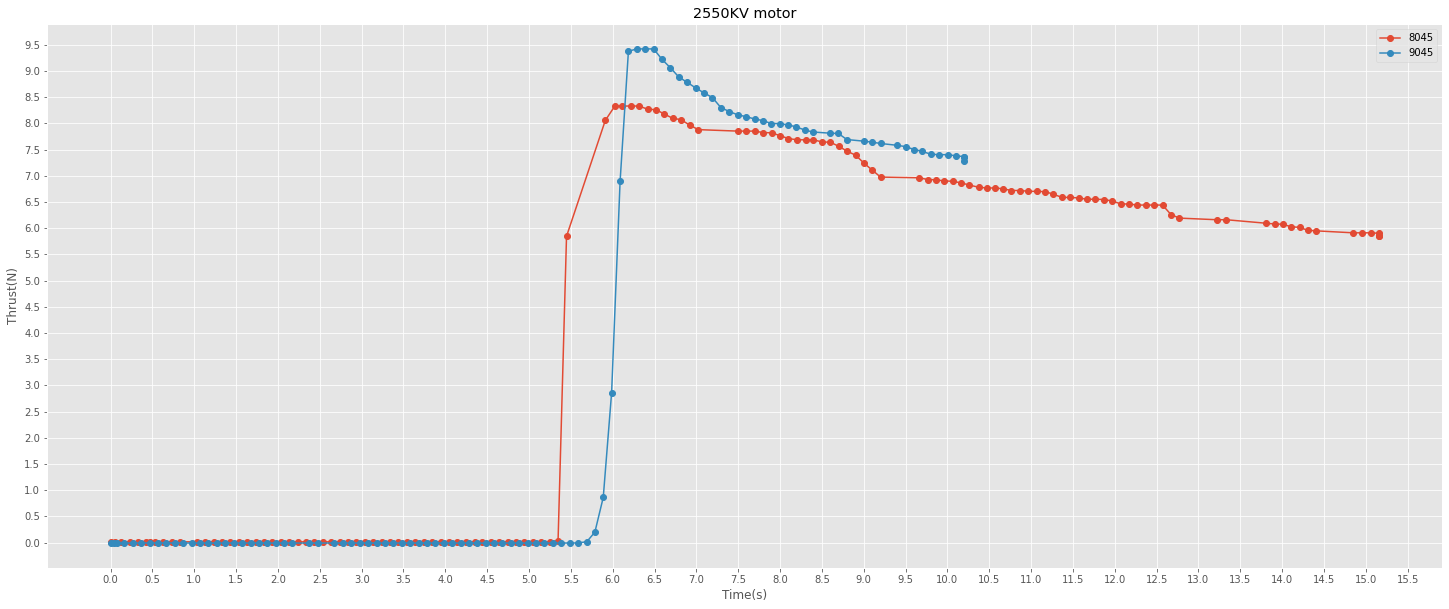

In [29]:
motor_2550kv_paths = ["data/2550KV_motor/8045_90.txt", "data/2550KV_motor/9045.txt"]

motor_2550kv_thrust = []
motor_2550kv_time = []
for file in motor_2550kv_paths:
    time,thrust = get_data(file)
    motor_2550kv_thrust.append(thrust)
    motor_2550kv_time.append(time)


labels = ["8045","9045"]
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25,10))
for i in range(len(motor_2550kv_time)):
    ax.plot(motor_2550kv_time[i],motor_2550kv_thrust[i],"-o",label=labels[i])
ax.legend()
ax.set(xlabel="Time(s)",ylabel="Thrust(N)",title="2550KV motor")
plt.xticks(np.arange(0,16,0.5))
plt.yticks(np.arange(0,10,0.5))
plt.savefig("2550_motor.png")
plt.show()





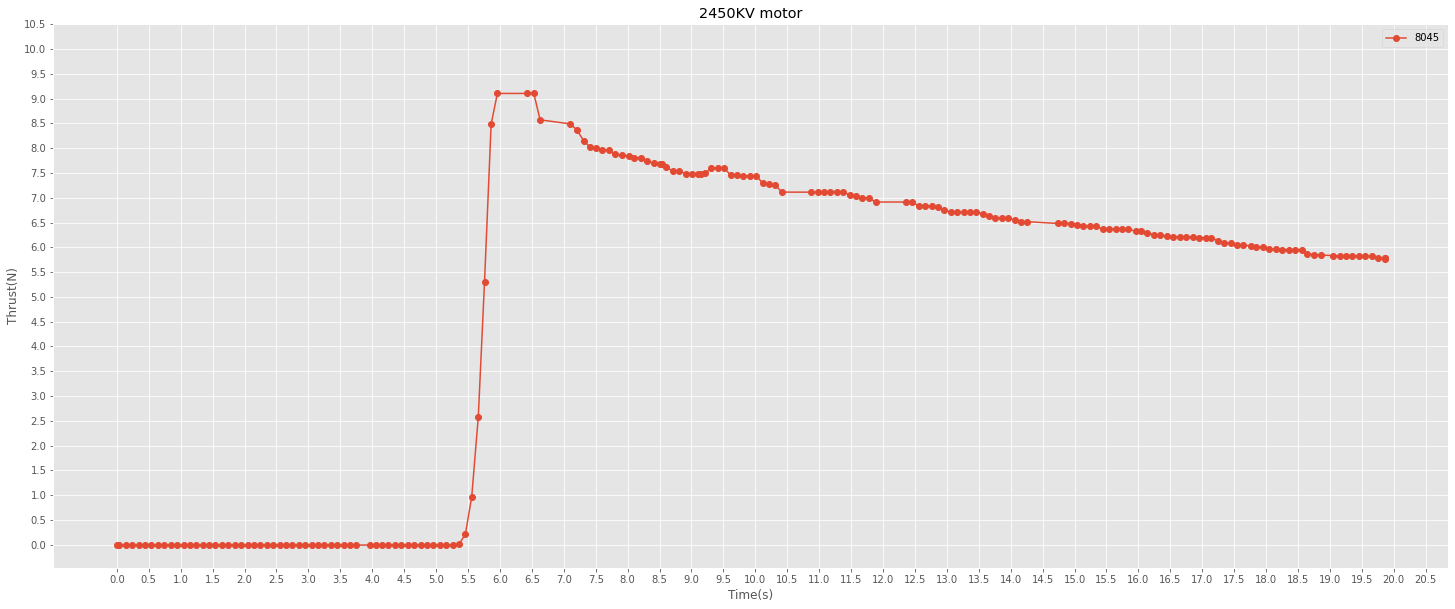

In [27]:
motor_2450kv_paths = ["data/2450KV_motor/8045_90_1.txt"]

motor_2450kv_thrust = []
motor_2450kv_time = []
for file in motor_2450kv_paths:
    time,thrust = get_data(file)
    motor_2450kv_thrust.append(thrust)
    motor_2450kv_time.append(time)


labels = ["8045","9045"]
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(25,10))
for i in range(len(motor_2450kv_time)):
    ax.plot(motor_2450kv_time[i],motor_2450kv_thrust[i],"-o",label=labels[i])
ax.legend()
ax.set(xlabel="Time(s)",ylabel="Thrust(N)",title="2450KV motor")
plt.xticks(np.arange(0,21,0.5))
plt.yticks(np.arange(0,11,0.5))
plt.savefig("small_2450_motor.png")
plt.show()



